# **Analiza aktivnosti igrača na Steam platformi i pandemije**

### Programinranje za analizu podataka
### **Luka Gvozdanović**

## Uvod

Između 2020 i 2022 cijeli svijet je pogodila pandemija COVID-19 virusa. Zbog pandemije, točnije karantene, svi su bili zaključani u kućama, kao izvor zabave puno ljudi se prepustilo igranju igrica, od kud dolazi i motivacija za analizom podataka koji su nastali u doba pandemije.

Kao izvor aktivnih igrača koristi se platforma **Steam**, i izabrana igra Counter-Strike 2 (originalnog naziva Counter-Strike: Global Offensive, ali zbog velike promjene u grafici i mehanici je preimenovana u Counter-Strike 2). Prvi dataset o aktvnosti igrača sakupljamo sa stranice __[SteamCharts](https://steamcharts.com/app/730)__, gdje se prati broj igrača od same publikacije igre (od 2012.). Druga dva dataseta su preuzeta sa stranice __[Kaggle](https://www.kaggle.com)__, jedan dataset ima popis igra i njihove karakteristike, dok drugi ima podatke o tada aktivnim slučajevima COVID-19 virusa.

Cilj same analize je vidjeti kako je pandemija u njezinom najvećem vrhuncu utjecala na gaming industiju, točnije samu igru Counter-Strike, ako se utjecaj uopće može vidjeti.

## Opis implementacije

Za dokumentaciju i pokretanje vizualizacija koristi se Jupyter Notebook. Jupyter omogućuj da napravljeni dokumenti budu čitljivi i lako razumljivi za ljude  sa elementom kodnih blokova u kojima se mogu izvršavati mali programi.

U projektu se koristi programski jezik Python koji pruža brojne biblioteke, kao što su mathploth i pandas koje omogućuju čišćenje podataka te sam vizualni prikaz istih.

Za pohranu se koristi SQLite, mali i brzi SQL pogon za pohranjivanje podataka u bazu.

Na kraju, koristi se i REST API (pomoću biblioteke flask) koji pruža fleksibilnu i jednostavnu integraciju aplikacija, i  povezivanje komponenti u mikro-servisnim arhitekturama.


## Prikaz rada aplikacije

Prije samog početka potrebno je uvest sve biblioteke koji čiste podatke i prikazuju ih.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

Zatim možemo uvest sve datasetove s kojima ćemo raditi. za svaki dataset ćemo izvsiti komandu *head()* koja će ispisati prvih pet redova podataka, *.info()* koja ispisuje osnovne informacije i *.column* koja ispisuje u listu imena svih stupca.

In [63]:
#SteamCharts
cs_df = pd.read_json('csgo_steamcharts_data.json')

cs_df.head()

,Month,Avg. Players,Gain,% Gain,Peak Players
0,December 2024,913953.36,61789.06,+7.25%,1740261
1,November 2024,852164.30,22725.54,+2.74%,1556938
2,October 2024,829438.76,-6867.90,-0.82%,1484045
3,September 2024,836306.66,-61031.22,-6.80%,1473144
4,August 2024,897337.88,21972.80,+2.51%,1425958


In [64]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         150 non-null    object 
 1   Avg. Players  150 non-null    float64
 2   Gain          150 non-null    object 
 3   % Gain        150 non-null    object 
 4   Peak Players  150 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.0+ KB


In [65]:
cs_df.columns

Index(['Month', 'Avg. Players', 'Gain', '% Gain', 'Peak Players'], dtype='object')

In [132]:
steam_df = pd.read_json('games.json')
steam_df.head()

,20200,655370,1732930,1355720,1139950,1469160,1659180,1968760,1178150,320150,...,3148680,2435240,2214970,3165130,3199580,3080940,2593970,3137150,3124670,3054200
name,Galactic Bowling,Train Bandit,Jolt Project,Henosis™,Two Weeks in Painland,Wartune Reborn,TD Worlds,Legend of Rome - The Wrath of Mars,MazM: Jekyll and Hyde,Deadlings: Rotten Edition,...,Guard,Sulphur Memories: Alchemist,Get To The Gate,SLIME ORDER,Carbon Playtest,Femdom Game World: Mom,Blocky Farm,Infiltrate & Extract,Escape The Garage,Lober Lobe
release_date,"Oct 21, 2008","Oct 12, 2017","Nov 17, 2021","Jul 23, 2020","Feb 3, 2020","Feb 26, 2021","Jan 9, 2022","May 5, 2022","Apr 2, 2020","Nov 11, 2014",...,"Aug 23, 2024","Aug 9, 2024","Aug 19, 2024","Aug 28, 2024","Sep 1, 2024","Aug 22, 2024","Aug 30, 2024","Aug 30, 2024","Aug 29, 2024","Aug 30, 2024"
required_age,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
price,19.99,0.99,4.99,5.99,0.0,0.0,10.99,9.99,14.99,3.99,...,0.59,11.99,19.99,0.99,0.0,4.19,8.99,0.0,4.99,4.49
dlc_count,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Kod ispisa tablice, vidimo problem. Vidimo da su "ID" igri postavljeni kao stupci, a u prvi stupac su postavljeni atributi. Ovaj problem rješavamo tako da transponiramo tablicu

In [133]:
steam_df = steam_df.T
steam_df.reset_index(inplace=True)

steam_df.head()

,index,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,...,,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow..."
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,...,,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'..."
2,1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,...,,0,0,0 - 20000,0,0,0,0,0,[]
3,1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,...,,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,...,,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '..."


In [134]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     97410 non-null  int64 
 1   name                      97410 non-null  object
 2   release_date              97410 non-null  object
 3   required_age              97410 non-null  object
 4   price                     97410 non-null  object
 5   dlc_count                 97410 non-null  object
 6   detailed_description      97410 non-null  object
 7   about_the_game            97410 non-null  object
 8   short_description         97410 non-null  object
 9   reviews                   97410 non-null  object
 10  header_image              97410 non-null  object
 11  website                   97410 non-null  object
 12  support_url               97410 non-null  object
 13  support_email             97410 non-null  object
 14  windows               

In [135]:
steam_df.columns

Index(['index', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu',
       'tags'],
      dtype='object')

In [136]:
covid_df = pd.read_csv('worldometer_coronavirus_daily_data.csv')

covid_df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [137]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     184787 non-null  object 
 1   country                  184787 non-null  object 
 2   cumulative_total_cases   184787 non-null  float64
 3   daily_new_cases          174329 non-null  float64
 4   active_cases             166747 non-null  float64
 5   cumulative_total_deaths  178227 non-null  float64
 6   daily_new_deaths         157850 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.9+ MB


In [138]:
covid_df.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')

### Prvi dataset - SteamCharts

Prvi graf će pokazivati koliko je **igrača u prosjeku bilo aktivno** na video igri Counter-Strike 2 (kasnije u dokumentu samo CS2). Prvo je potrebno promijeniti format datuma kako bi se mogao sortirati prema brojevima, jer trenutno su datumi pisani na ovaj način *"June 2024"*.

C:\Users\Luka\AppData\Local\Temp\ipykernel_6908\1518287210.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


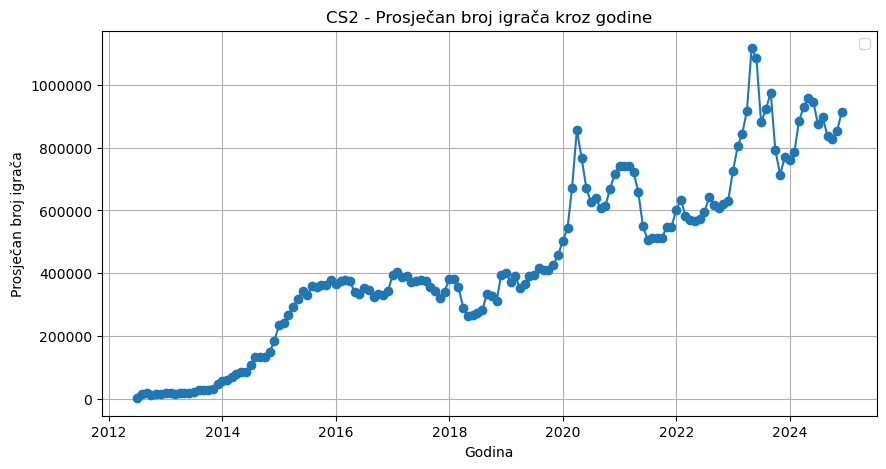

In [139]:
cs_df['Month'] = pd.to_datetime(cs_df['Month'], format='%B %Y')
cs_df = cs_df.sort_values('Month')

plt.figure(figsize=(10, 5))
plt.plot(cs_df['Month'], cs_df['Avg. Players'], marker='o', linestyle='-')
plt.ticklabel_format(style='plain', axis='y') 

plt.xlabel("Godina")
plt.ylabel("Prosječan broj igrača")
plt.title("CS2 - Prosječan broj igrača kroz godine")
plt.grid(True)
plt.legend()

plt.show()

Analizom grafa, primjećuje se porast kroz godine. Već ovdje dobivamo znak kako se desio veći porast između 2020 i 2022 godine. Ovdje se nalazi još jedan skok; razlog skoka je da je igra dobila značajno ažuriranje u rujnu 2023, koje je privuklo brojne igrače.

Sljedeći graf prikazuje **10 najigranijih mjeseci**. Sortiramo vrijednosti od najveće prema najmanjoj *ascending=False*.

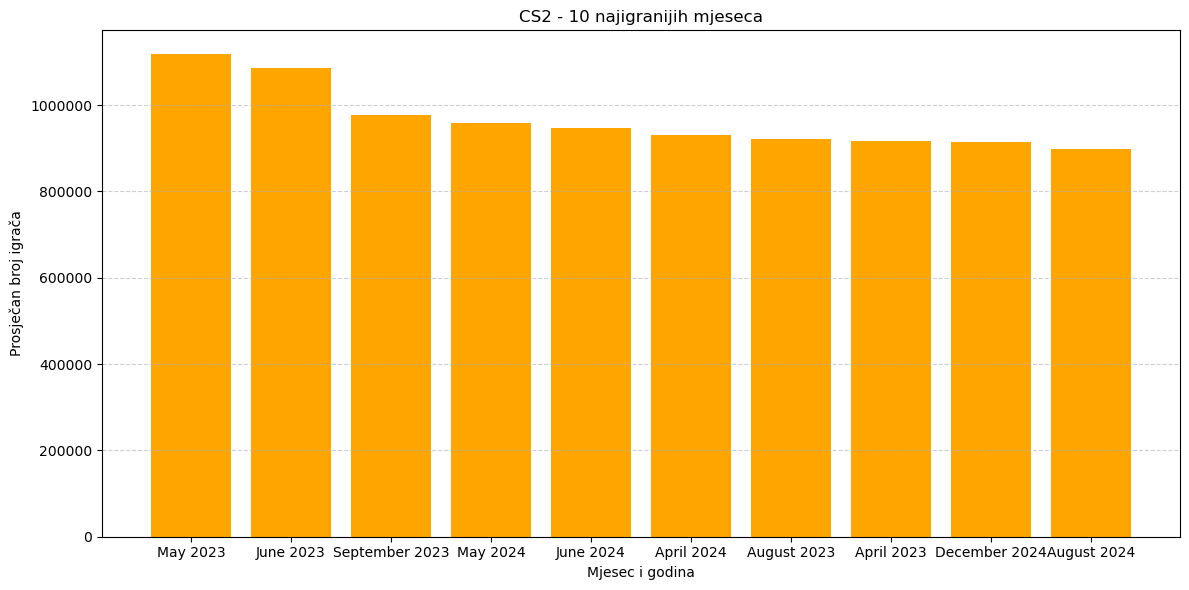

In [140]:
cs_df['Month'] = pd.to_datetime(cs_df['Month'], format='%B %Y')
cs_df = cs_df.sort_values('Avg. Players', ascending=False)

top10 = cs_df.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10['Month'].dt.strftime('%B %Y'), top10['Avg. Players'], color='orange')

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Mjesec i godina")
plt.ylabel("Prosječan broj igrača")
plt.title("CS2 - 10 najigranijih mjeseca")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Vidimo kako su prva tri mjesta mjeseci koji su vremenski blizu ažuriranju koje se dogodilo u rujnu 2023. Razlog tome je opet, veliko ažuriranje igre.

Graf prikazuje **10 najmanje igranih mjeseca**. Sortiramo vrijednosti od najmanje prema najvećoj *ascending=True*.

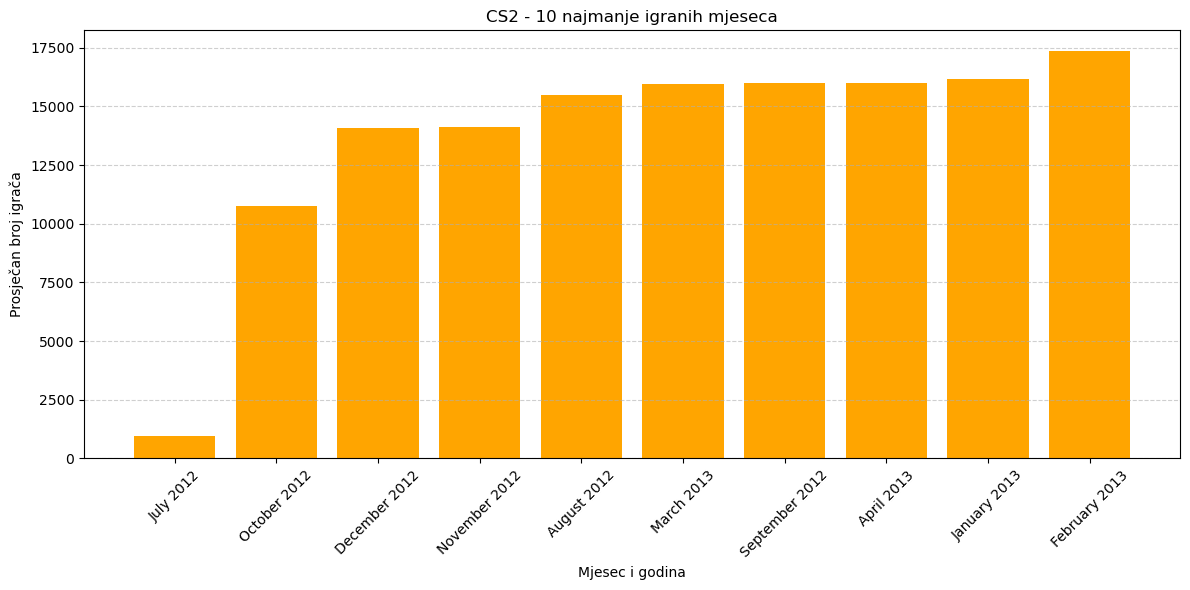

In [141]:
cs_df['Month'] = pd.to_datetime(cs_df['Month'], format='%B %Y')
cs_df = cs_df.sort_values('Avg. Players', ascending=True)

top10 = cs_df.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10['Month'].dt.strftime('%B %Y'), top10['Avg. Players'], color='orange')

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Mjesec i godina")
plt.ylabel("Prosječan broj igrača")
plt.title("CS2 - 10 najmanje igranih mjeseca")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Primjećujemo da je broj igrača tijekom prvog mjeseca na grafu vrlo nizak, što se može objasniti činjenicom da je igra tek bila izdana.

### Drugi dataset - Steam video igre

Prvi graf za ovaj dataset će prikazivati **broj najčešćih žanrova** na platformi **Steam**. 

*.explode()* je funkcija iz pandas biblioteke koja razdvaja podatke u jednoj ćeliji. Primjer, imamo ćelija=[podatakA, podatakB, podatakC], nakon *.explode()* svaki podatak se stavlja u svoj red, dok su u protivnom svi podaci bili u jednom redu.

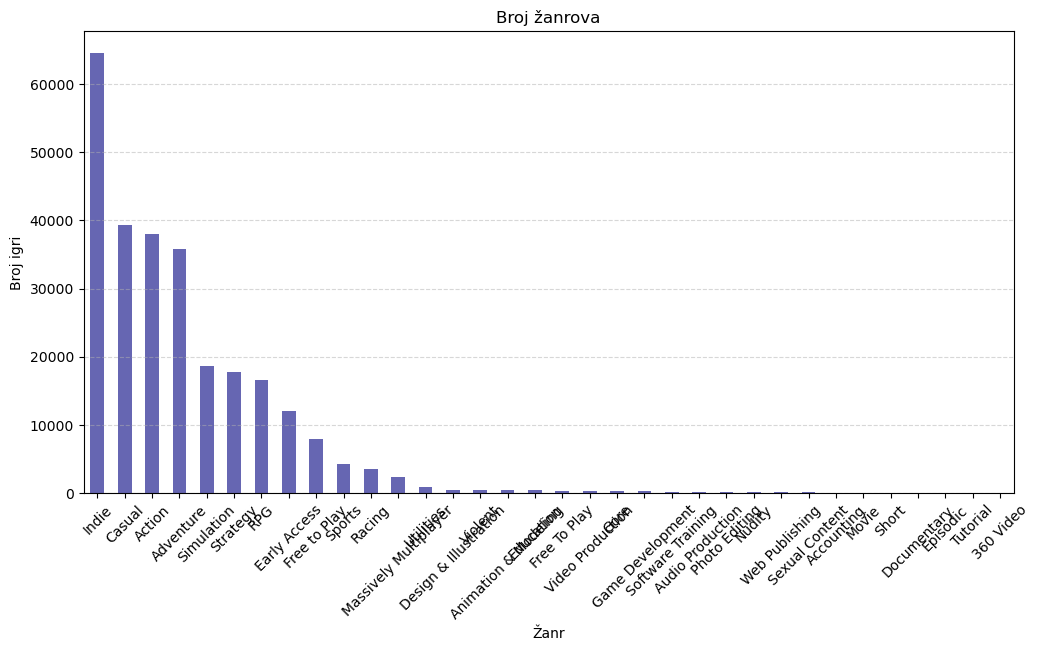

In [142]:
zanrovi = steam_df["genres"].explode()

zanr_zbroj = zanrovi.explode().value_counts()

plt.figure(figsize=(12, 6))
zanr_zbroj.plot(kind="bar", color="navy", alpha=0.6)
plt.title("Broj žanrova")
plt.xlabel("Žanr")
plt.ylabel("Broj igri")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

Žanr s najvećim brojem igri je *Indie*

Sljedeći graf pokazuje **Broj izdanih igri u godini**.

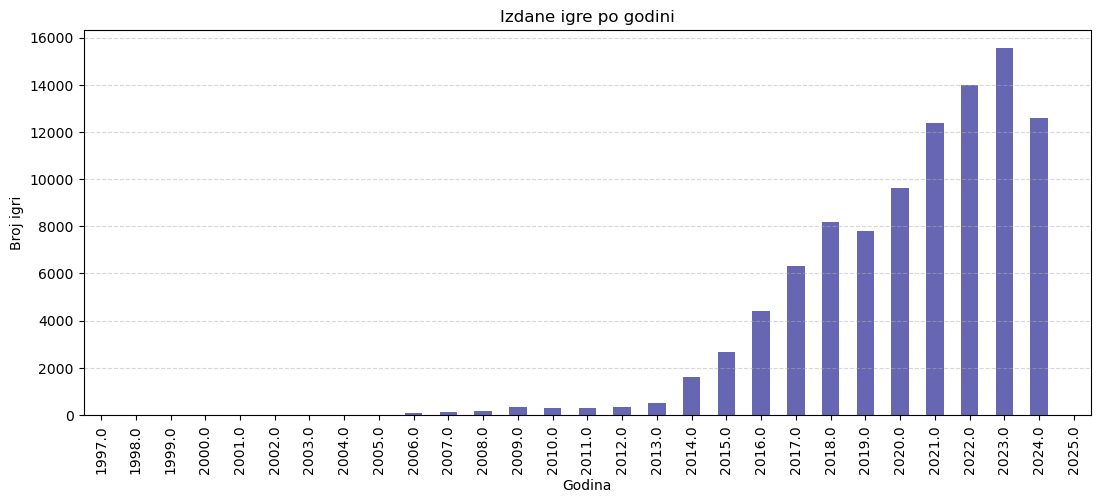

In [143]:
steam_df["release_date"] = pd.to_datetime(steam_df["release_date"], errors="coerce")
steam_df["release_year"] = steam_df["release_date"].dt.year
izdane = steam_df.groupby("release_year").size()

izdane.plot(kind="bar", figsize=(13, 5), color="navy", alpha=0.6)
plt.title("Izdane igre po godini")
plt.xlabel("Godina")
plt.ylabel("Broj igri")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Najveći stupac ukazuje na najviše objavljenih igri. Potencijalno bi stupaca 2024 bio veći, ali je zadnje ažuriranje datasete bilo otprilike u kolovozu 2024. 

Sljedeći graf je *pie chart* koji pokazuje odnos **plaćenih i besplatnih igri**

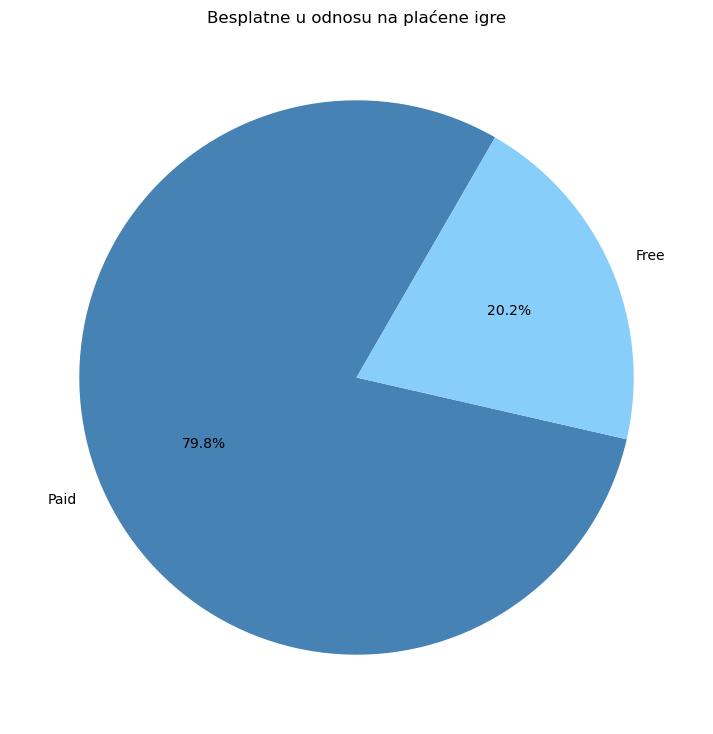

In [144]:
besp_placene = steam_df["price"].apply(lambda x: "Free" if x == 0 else "Paid").value_counts()

# Kreiranje pie charta
plt.figure(figsize=(9, 9))
besp_placene.plot(kind="pie", autopct="%1.1f%%", startangle=60, colors=["steelblue", "lightskyblue"])
plt.title("Besplatne u odnosu na plaćene igre")
plt.ylabel("")
plt.show()

Ovaj graf nam daje doznanja koliko je više igrica koje se plaćaju u odnosu na besplatne igre.

### Treći dataset - COVID-19

Za prvi graf ovog dataseta ćemo prikazati **broj aktivnih slučaja kroz vrijeme u državi Hrvatska**.

*.to_period()* je još jedna funkcija iz pandas bilioteke kojapretvara *datetimeindex* objekte u *periodindex* objekte. S ovime se može ispisati samo mjesec umjesto cijelog datuma. *.to_timestamp()* je suprotno od *.to_period()*. Prebacuje *periodindex* objekte u *datetimeindex* objekte. Još se koristi funkcija *.strftime()* koja formatira datume u string.

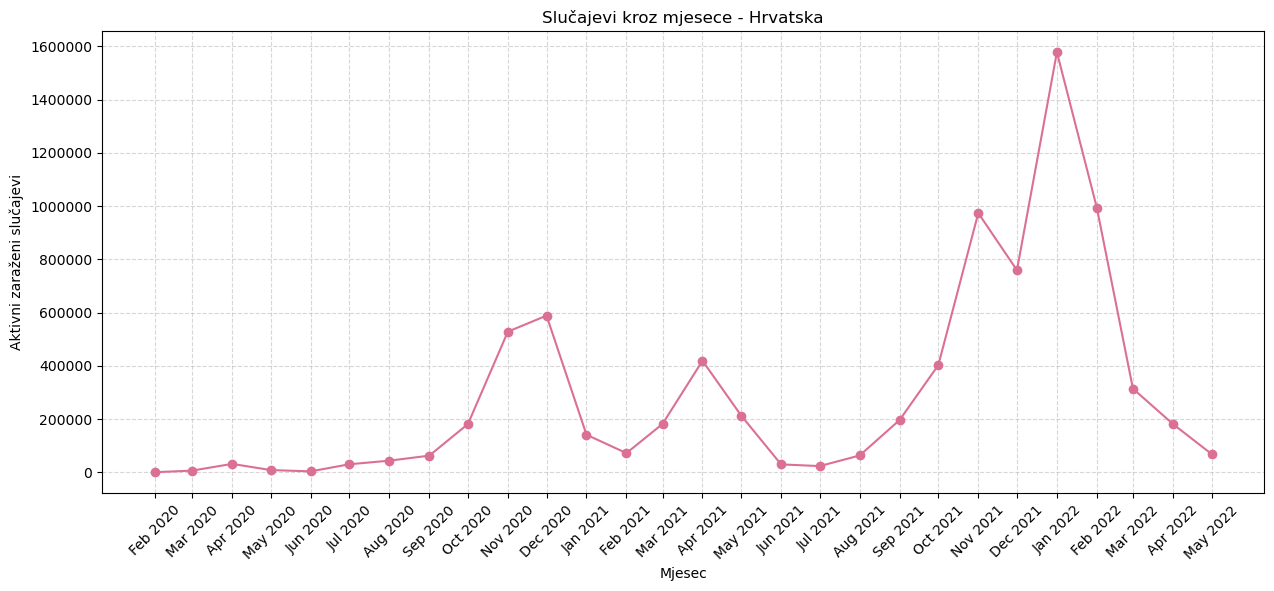

In [ ]:
covid_df["date"] = pd.to_datetime(covid_df["date"])
hrv = covid_df[covid_df["country"] == "Croatia"]

mjesec_hrv = hrv.groupby(hrv["date"].dt.to_period("M"))["active_cases"].sum()
mjesec_hrv.index = mjesec_hrv.index.to_timestamp()

plt.figure(figsize=(15, 6))
plt.plot(mjesec_hrv.index, mjesec_hrv, marker='o', linestyle='-', color='palevioletred')

plt.xlabel("Mjesec")
plt.ylabel("Aktivni zaraženi slučajevi")
plt.title("Slučajevi kroz mjesece - Hrvatska")
plt.xticks(mjesec_hrv.index, mjesec_hrv.index.strftime('%b %Y'), rotation=45)
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Analizom grafa možemo vidjeti da postoje tri skoka; u prosincu 2020, u travnju 2021 i u siječnju 2022.

Sljedeći graf je sličan prošlom, samo ovdje se prikazuje broj slučaja na globalnoj razini (sve drzave).

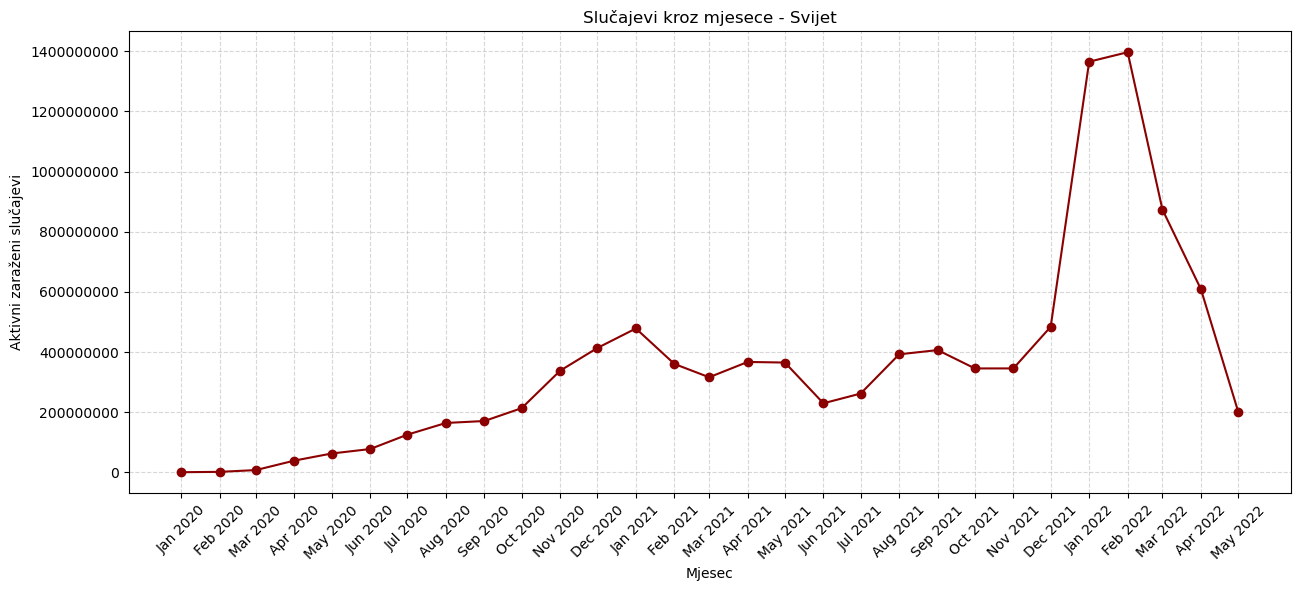

In [161]:
covid_df["date"] = pd.to_datetime(covid_df["date"])

mjesec_svijet = covid_df.groupby(covid_df["date"].dt.to_period("M"))["active_cases"].sum()
mjesec_svijet.index = mjesec_svijet.index.to_timestamp()

plt.figure(figsize=(15, 6))
plt.plot(mjesec_svijet.index, mjesec_svijet, marker='o', linestyle='-', color='darkred')

# Dodaj oznake i stil
plt.xlabel("Mjesec")
plt.ylabel("Aktivni zaraženi slučajevi")
plt.title("Slučajevi kroz mjesece - Svijet")
plt.xticks(mjesec_svijet.index, mjesec_svijet.index.strftime('%b %Y'), rotation=45)
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Analiza slučajeva u svijetu govori kako je bio mali skok u siječnju 2021, i jako velik skok tijekom veljače 2022.

## Složeni grafovi

U ovom dijelu će biti prikazani složeni grafovi

Prvo će se prikazati **prosjek igrača i aktivni slučajevi kroz vrijeme**

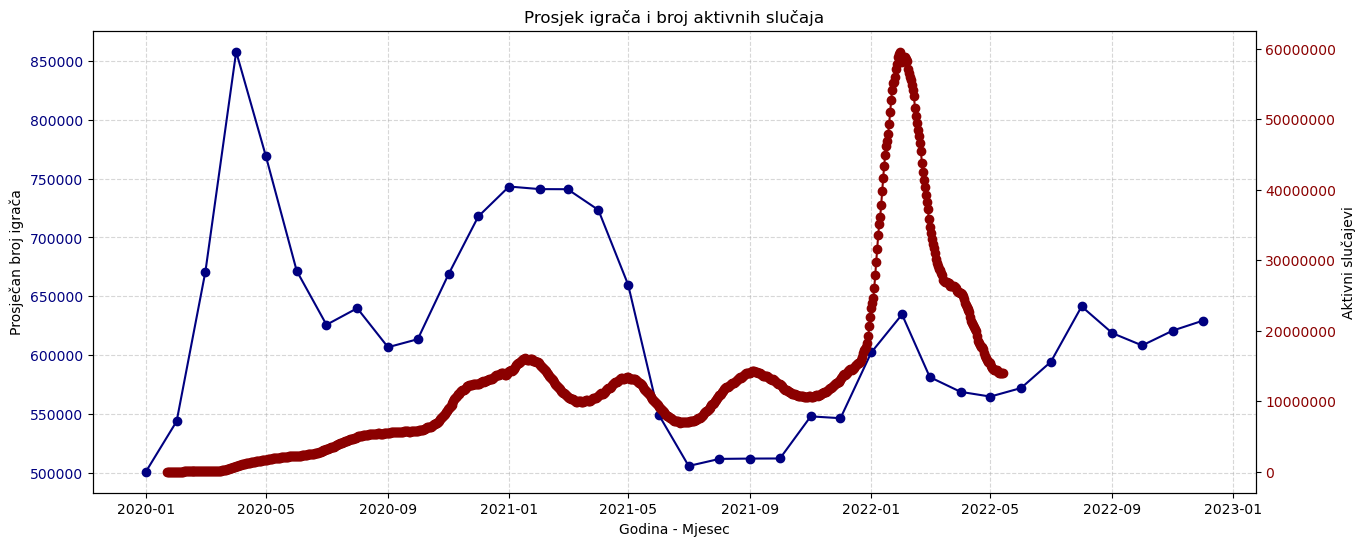

In [186]:
cs_df['Month'] = pd.to_datetime(cs_df['Month'], format='%B %Y')
cs_df = cs_df.sort_values('Month')
cs_datum = cs_df[(cs_df['Month'] >= '2020-01-01') & (cs_df['Month'] <= '2022-12-31')]

covid_df["date"] = pd.to_datetime(covid_df["date"])
svijet = covid_df.groupby("date")["active_cases"].sum()

fig, g1 = plt.subplots(figsize=(15, 6))

g1.plot(cs_datum['Month'], cs_datum['Avg. Players'], marker='o', linestyle='-', color='navy')
g1.set_xlabel("Godina - Mjesec")
g1.set_ylabel("Prosječan broj igrača")
g1.tick_params(axis='y', labelcolor='navy')

g2 = g1.twinx()
g2.plot(svijet.index, svijet.values, marker='o', linestyle='-', color='darkred')
g2.set_ylabel("Aktivni slučajevi",)
g2.ticklabel_format(style='plain', axis='y') 
g2.tick_params(axis='y', labelcolor='darkred')

plt.title("Prosjek igrača i broj aktivnih slučaja")
g1.grid(True, linestyle='--', alpha=0.5)

plt.show()

Vidljivo je značajno povećanje prosječnog broja igrača (tamno plava linija) tijekom početka pandemije, što se poklapa s naglim porastom broja aktivnih slučajeva COVID-19 (tamno crvena linija). Zatim vidimo da broj igrača počinje padati u travnju i svibnju 2021 godine, kada su se lockdown mjere smanjile i kada su se ljudi navikli na takve okolnosti. Između lipnja i listopada broj igrača se smanjio i stagnirao, ali zatim u studenom 2021 se aktivnost igrača ponovo diže, ali vidimo da i broj aktivnih slučajeva povečava. Ovdje se tamno plava linija nije drastično povečala.

Sljedeći graf će prikazivati **broj izdanih igri u odnosu na aktivne slučajeve** kroz vrijeme.

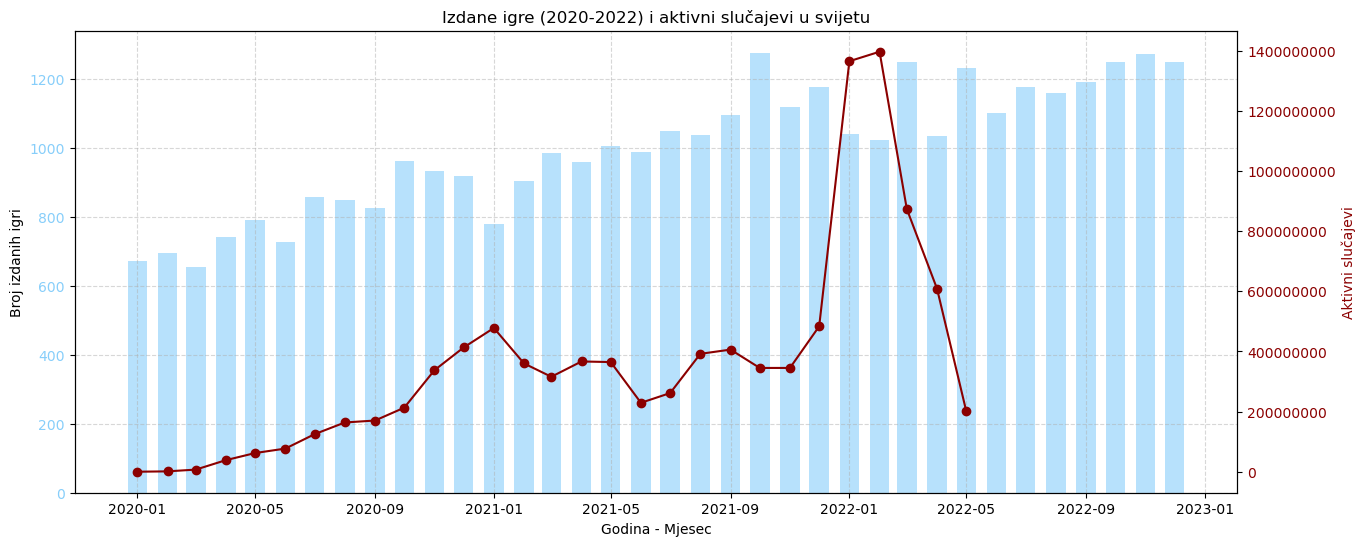

In [187]:
covid_df["date"] = pd.to_datetime(covid_df["date"])

steam_df["release_date"] = pd.to_datetime(steam_df["release_date"], format="%b %d, %Y", errors="coerce")
steam_df = steam_df.dropna(subset=["release_date"])

steam_df = steam_df[(steam_df["release_date"] >= "2020-01-01") & (steam_df["release_date"] <= "2022-12-31")]

steam_df["Month"] = steam_df["release_date"].dt.to_period("M").dt.to_timestamp()

izdane_igre = steam_df.groupby("Month").size()

svijet_slucajevi = covid_df.groupby(covid_df["date"].dt.to_period("M"))["active_cases"].sum()
svijet_slucajevi.index = svijet_slucajevi.index.to_timestamp()

fig, g1 = plt.subplots(figsize=(15, 6))

g1.bar(izdane_igre.index, izdane_igre.values, color="lightskyblue", alpha=0.6, width=20)
g1.set_xlabel("Godina - Mjesec")
g1.set_ylabel("Broj izdanih igri")
g1.tick_params(axis="y", labelcolor="lightskyblue")

g2 = g1.twinx()
g2.plot(svijet_slucajevi.index, svijet_slucajevi.values, color="darkred", marker="o", linestyle="-")
g2.ticklabel_format(style='plain', axis='y') 
g2.set_ylabel("Aktivni slučajevi", color="darkred")
g2.tick_params(axis="y", labelcolor="darkred")

plt.title("Izdane igre (2020-2022) i aktivni slučajevi u svijetu")
g1.grid(True, linestyle="--", alpha=0.5)

plt.show()

Analizom ovog grafa možemo vidjeti da broj izdanih igri (svjetlo plavi stupci) raste linerano, što može ukazivati na to da su, tijekom eskalacije situacije s pandemijom, i kompanije za video igre bile podložne lockdown mjerama.

### Pohrana u bazu

Ovaj kod omogućava slanje podataka na SQLite bazu.

In [207]:
import sqlite3

covid_path = 'worldometer_coronavirus_daily_data.csv'
covid_ds = pd.read_csv(covid_path)

cs_path = 'csgo_steamcharts_data.json'
cs_ds = pd.read_json(cs_path)

conn = sqlite3.connect('steam_covid.db')

covid_ds.to_sql('CovidDataset', conn, if_exists='replace', index=False)
cs_ds.to_sql('CS2dataset', conn, if_exists='replace', index=False)

conn.commit()
conn.close()


Pomoću flask REST API-a se dohvaćaju podaci iz SQLite baze (steam_covid.db). Kada se pokrene kod, preko web preglednika možemo vidjeti REST na portu 8000. Na kraj "adrese" dodaje se putanja do željenog REST-a, na primjer */rest/c2*. 

In [211]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)

def connect_db():
    conn = sqlite3.connect('steam_covid.db')
    conn.row_factory = sqlite3.Row 
    return conn

@app.route('/rest/covid', methods=['GET'])
def dohvati_covid():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM CovidDataset LIMIT 5")
        rows = cursor.fetchall()
        
        cs2 = [dict(row) for row in rows]
        
        return jsonify(cs2), 200  
    except Exception as e:
        return jsonify({"error": str(e)}), 500  
    finally:
        conn.close()
        
@app.route('/rest/cs2', methods=['GET'])
def dohvati_cs2():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM CS2dataset LIMIT 5")
        rows = cursor.fetchall()
        
        cs2 = [dict(row) for row in rows]
        
        return jsonify(cs2), 200  
    except Exception as e:
        return jsonify({"error": str(e)}), 500  
    finally:
        conn.close()
if __name__ == '__main__':

    app.run(debug=True, port=8000, use_reloader=False)  


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [26/Jan/2025 15:20:12] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [26/Jan/2025 15:20:12] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Jan/2025 15:20:16] "GET /rest/cs2 HTTP/1.1" 200 -


127.0.0.1 - - [26/Jan/2025 15:20:52] "GET / HTTP/1.1" 404 -



![REST](rest.jpg) 

Ovo je prikaz jednog REST servisa; prikazuju se redci iz dataseta *csgo_steamcharts_data.json*

## Kritički osvrt

### Očekvanja

Prije bih naglasio da iako su ljudi bili bolesni, morali su jedan period (obično dva tjedna) biti bez kontakta drugih osoba. Rezultat tome je da su ljudi bili potencijalno zaključani u svoju sobu zajedno sa računalom, odakle i ideja za analizu.
U početku pravljenja analize sam očekivao drastičan porast broja aktivnih igrača, i da se ta krivulja, kroz neki vremenski period, jako blago spušta. Cilj mi je bio vidjeti hoće li se nakon zadržati igrači koji su se vratili igri nakon stanke, ili hoće li s zadržati igrači koji su tokom pandemije otkrili igru. Drugi zanimljivi složeni graf je prikazivao broj novo izdanih video igri kroz vremenski period pandemije, te broj tada aktivnih slučajeva. U toj analizi sam očekivao tokom pandemije da će se povećati broj novih video igara.

### Rezultati

Nakon izrade prvog grafa, i nakon njegove analize, može se uočiti kako je bilo „dva vrhunca“ tokom pandemije, te da su bili blago povezani sa situacijom aktivnih slučaja COVID-a. U početku pandemije, vidi se nagli porast, ali nakon kratkog „smirenja“ pandemije, doslo je do pada, te kasnije u drugom valu porast. Nakon analize drugog grafa, primjećuje se cijelo vrijeme blagi porast izbacivanja novih igra, te se ne može primijetiti neka velika korelacija.

### Ograničenja u analizi

Prvotna ideja je bila korištenje službenog Steam API-a kako bi se dohvatili podaci. No, zbog kompleksnosti i privatnih postavki, bilo je teško i komplicirano dohvaćat podatke. Kroz čitanje raznih dokumentacija, taj API, koliko sam shvatio, više služi u privatne svrhe i pregled raznih statistika (naravno, cilj kompanije Steam je privatnost tuđih podataka). Daleko najveća mana Steam API-a je bila ta da ne zabilježava vremenske podatke koji su ključni za provođenje slične analize. Kao odlična zamjena API-a postoji stranica SteamCharts koja za potrebe cijele analize vrhunski vrši svoj posao. Druga dva dataseta su također bili dobri i izvršavali svoju dužnost.

### Budući prijedlozi

U ovoj analizi je korištena samo jedna gaming platforma, Steam. Kako bi podaci postali precizniji mogući prijedlog bi bio pronalazak dataseta od konkurencijskih platformi kao što je Epic Games. Epic Games je izveden na sličan način kao i Steam; na obje platforme postoji ogromno velik broj igara koje se mogu kupiti te mogućnost pokretanja samih igri unutar nje. Sa Epic Games podacima bi se analiza mogla još više proširiti.
Prijedlog za još jedno proširenje bi bilo gledajući broj igrača i broj aktivnih slučajeva po državama, tom analizom bi mogli vidjeti koje su države imale najveći porast  u gaming industriji. 


## Zaključak

Kroz projekt su prikazani razni grafovi, neki vezani za video igre, neki za samu pandemiju, te neki koji prikazuju oboje. Gledajući složenije grafove (oni koji su nastali spajanjem dviju datasetova) možemo vidjeti da početkom lockdown-a povećava se broj igrača, te se broj igrača ponovo poveća krajem 2020 i početkom 2021. Sa ovim jednim primjerom možemo izvaditi neke zaključke. Ljudi su se kroz igranje video igara zbližavali i družili na jedini mogući način, na daljinu. Isto tako, igre su potencijalno postale nekakav bijeg za čovjeka iz realnosti, realnosti da je bio zatvoren u svoja četiri zida.

Za kraj možemo reći da izdavači video igara mogu iskoristiti takav nekakav „globalni trend“ kako bi dobili potencijalno veću pažnju izbacivanjem nove video igre. Naravno, nadajući se da se takav „trend“ više ne ponovi.

## Poveznice na datasetove

SteamCharts - https://steamcharts.com/app/730

Steam games (Kaggle) - https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data

COVID-19 (Kaggle) - https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset/data

## Literatura

[1] Jupyter Notebook, "What is Jupyter Notebook?", Beginner’s Guide, [Na internetu]. Dostupno: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html. [Pristupano: 24.1.2025.].

[2] SQLite, "About SQLite," [Na internetu]. Dostupno: https://www.sqlite.org. [Pristupano: 24.1.2025.].

[3] IBM, "REST APIs," [Na internetu]. Dostupno: https://www.ibm.com/think/topics/rest-apis. [Pristupano: 24.1.2025.].

[4] “pandas.DataFrame — pandas 2.0.3 documentation,” [Na internetu]. Dostupno: https://pandas.pydata.org/docs/reference/frame.html. [Pristupano: 25.1.2025.].